In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [78]:
weights=[4,3]
numLines=100

In [79]:
w=np.array(weights)
num_features=len(weights)
dataset=np.zeros((numLines,num_features+1))


In [80]:
for i in range(numLines):
    x=np.random.rand(1,num_features)*20-10
    # 计算內积
    inner_product=np.sum(w*x)
    # 小于0则是代表负实例，大于0则是代表正实例
    if inner_product<=0:
        dataset[i]=np.append(x,-1)
    else:
        dataset[i]=np.append(x,1)


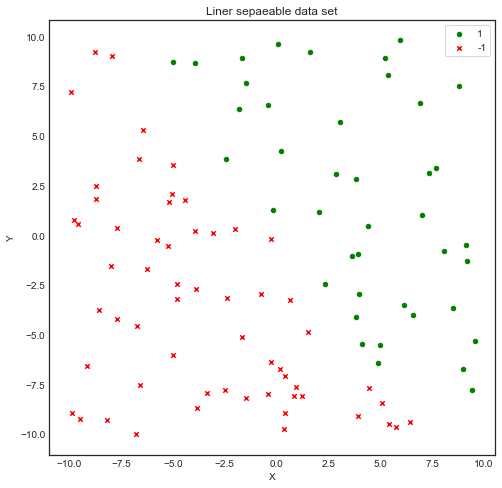

In [81]:

# 可视化我们的数据
fig,ax=plt.subplots(figsize=(8,8))
plt.title("Liner sepaeable data set")
plt.xlabel("X")
plt.ylabel("Y")
x1=dataset[dataset[:,2]==1][:,:2]
# x1[:,0]代表第一个特征，x1[:,1]代表第二个特征
plt.scatter(x1[:,0],x1[:,1],marker='o',color='g',label=1,s=20,cmap='viridis')

x2=dataset[dataset[:,2]==-1][:,:2]
plt.scatter(x2[:,0],x2[:,1],marker='x',color='r',label=-1,s=20,cmap='viridis')
plt.legend(loc="upper right",frameon=True)

In [ ]:
_w=np.zeros((1,num_features-1))  # initialize weights
separated=False
i=0
while not separated and i<numLines:
    if dataset[i][-1]*np.sum(_w*dataset[i,0:-1])<=0:  #假如数据分类错误
        _w=_w+dataset[i][-1]*dataset[i,0:-1]   #更新权值
        separated=False
        i=0
    else:
        i+=1   #分类正确则更新下一个数据点
_w